https://github.com/Pranjali1049/Salary_Prediction/blob/main/README.md
https://github.com/Pranjali1049/Salary_Prediction

In [117]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

problem statement:In today's competitive job market, understanding salary trends based on various factors such as age, gender, education level,
job title,and years of experience is crucial for both employees and employers.
This project aims to develop a machine learning model to predict salaries using a dataset containing 6,704 records and 6 key attributes.
By analyzing these factors,
the model will help job seekers estimate fair compensation and assist organizations in making data-driven salary decisions.

In [119]:
# Importing Data
df = pd.read_csv(r"D:\Users\Lenovo\Desktop\Salary_Data.csv")

In [121]:
df

Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...                   ...       ...  
6699                 20.0  200000.0  
6700                  3.0   50000.0  
6701                  4.0   55000.0  
6702                 14.0  140000.0  
6703                  1.0   35000.0  

[6704 rows x 6 columns]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [125]:
df.describe()

Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [127]:
# Checking for null values in the data
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [129]:
# Dropping null values from database
df.dropna(inplace=True)

In [131]:
# Checking unique value counts of Job Titles in the database
df['Job Title'].value_counts()

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [133]:
# Reducing Job titles by omitting titles with less than 25 counts
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [135]:
# Omitting titles with less than 25 counts
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [137]:
#Checking unique value count of Education Level
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [139]:
# Combining repeating values of education level
df['Education Level'] = df['Education Level'].replace(
    {"Bachelor's Degree": "Bachelor's", "Master's Degree": "Master's", "phD": "PhD"}
)
df['Education Level'].value_counts()

Education Level
Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: count, dtype: int64

In [141]:
# Checking Unique Value count of Gender
df['Gender'].value_counts()

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64

Exploratory Data Analysis

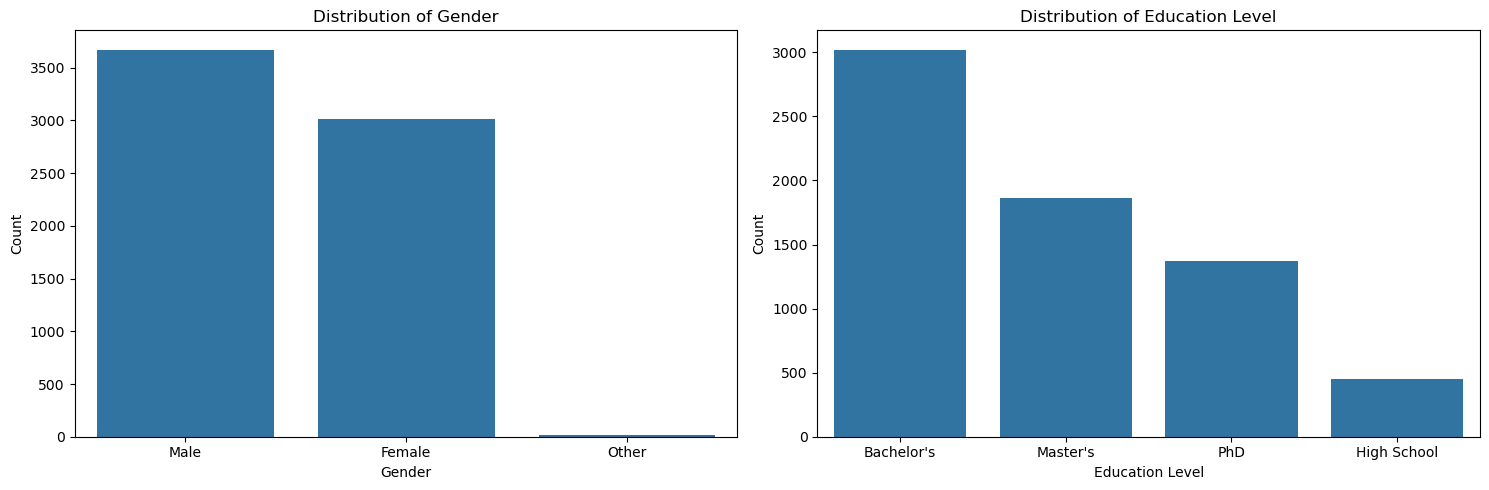

In [144]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

Distribution of Gender and Education Level

Distribution of Gender: The job market is mostly dominated by males with females being second largest group and extremely few people from the third gender. This shows that while women are slowly becoming a part of the workforce, people belonging to other genders do have very few opportunities.

Distribution of Education Level: A majority of working professionals hold a bachelor's degree followed by master's and PhD holders with least hireable being just High school graduates. This means a bachelor's degree is sufficient to enter the workforce and highly in demand by employers.

In [147]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

Top 10 Highest Paying Jobs
The plot shows the Top 10 highest paying jobs in the industry plotted against the mean salary offered for the role. We can see that Data Scientists and Engineers are paid the highest.

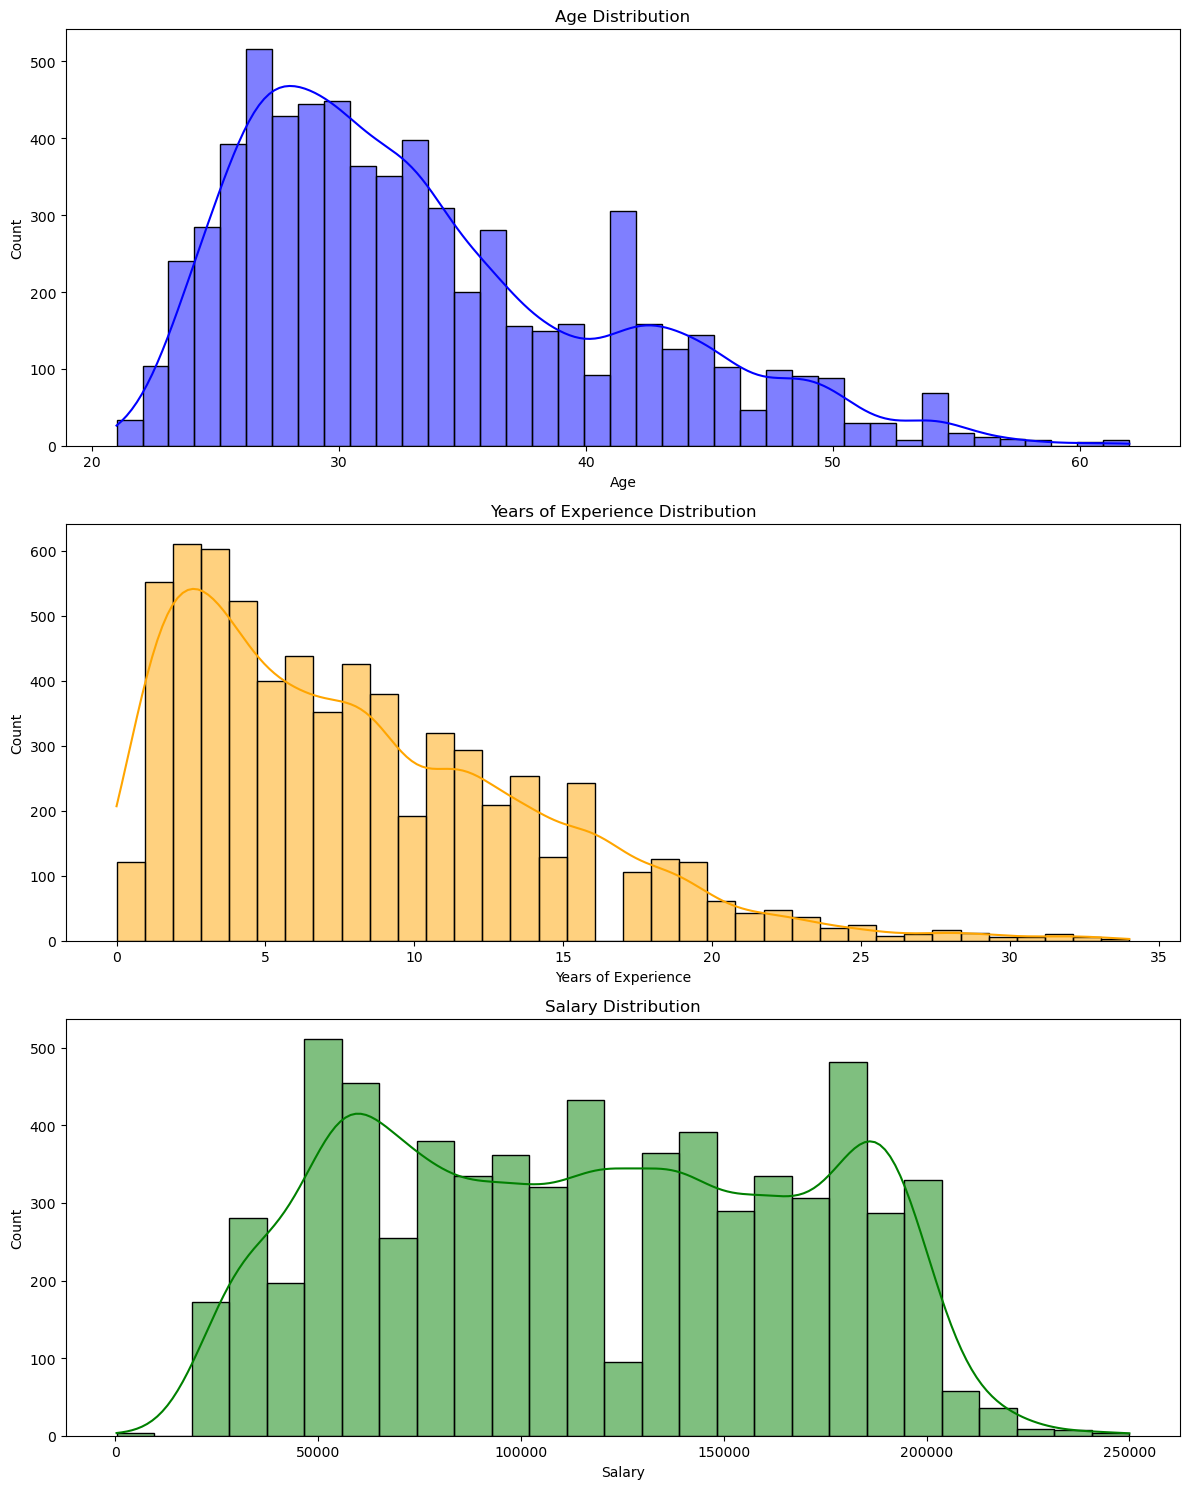

In [150]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

Distribution of continuous variables

Age Distribution: It shows that majority of workforce lies in the 27-31 age range which suggests a highly youthful workforce.

Years of Experience Distribution: The plot shows that maximum workforce has 1-4 years of experience which is in agreement with previous results. Younger workforce has less experience than older counterparts

Salary Distribution: The salary majority of workers earn lies in 50,000-60,000 dollars range while similar count of people earn 1,80,000 as well. The plot reveals that there is a lot of different pay ranges within the community with majority of workers earning less than 1,25,000 dollars yearly.

In [152]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Relationship between discreet variables

Gender and Salary: Other genders earn more than men and women. Women earn the least out of all three genders.

Education Level and Salary: The plot reveals that as your education level rises, the mean salary level also rises. High school graduates are paid the least and PhD's the highest. The box plot also reveals the range of salaries and it is highest for bacahelr's degree meaning the distribution of salaries is more diverse for bachelor's degree with some earning as much as somone with a Master's degree would.

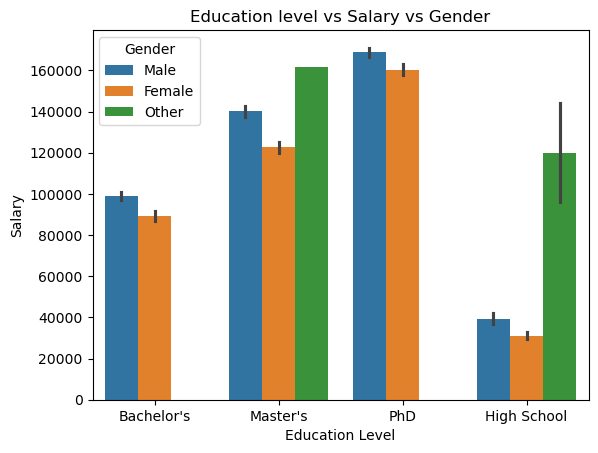

In [156]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

Relationship between Education Level, Salary and Gender

Following trends from previous charts, men on an average are paid more than women with same education level. Where the third gender is present, they are paid more than both the genders. Also, the more you are educated, the more you are paid.

In [159]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

Relationship between Age and Salary: The is strong positive correlation between age and salary meaning older employees get paid more than younger e,ployees.

Relationship between Experience and Salary: There is strong positive correlation between Experience and salary meaning experienced candidates get paid more. The more experience a candidate gains, the more their salary will become.

In [161]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.xticks(rotation=60) 
plt.yticks(rotation=60) 
plt.show()

Heatmap

The heatmap reveals the degree of correlation between the variables

Highest correlation between age and years of experience
High correlation between salary and years of experience
High correlation between salary and age
Moderately high correlation between salary and education level
Low correlation between gender and all variables
Predicting Salary

3 Models will be used to predict the salary

Linear Regression
Deision Tree
Random Forest

In [163]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [167]:
df[df.Salary>upper]

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []

No outliers in Q3

In [170]:
df[df.Salary<lower]

Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []

No outliers in Q1

Preparing the data for ML analysis by converting categorical job titles into a numerical format

In [174]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

Age  Gender Education Level  Years of Experience    Salary  \
0  32.0    Male      Bachelor's                  5.0   90000.0   
1  28.0  Female        Master's                  3.0   65000.0   
2  45.0    Male             PhD                 15.0  150000.0   
3  36.0  Female      Bachelor's                  7.0   60000.0   
4  52.0    Male        Master's                 20.0  200000.0   

   Content Marketing Manager  Data Analyst  Data Scientist  \
0                      False         False           False   
1                      False          True           False   
2                      False         False           False   
3                      False         False           False   
4                      False         False           False   

   Digital Marketing Manager  Director of Data Science  ...  \
0                      False                     False  ...   
1                      False                     False  ...   
2                      False                     False  ...   
3                      False                     False  ...   
4                      False                     False  ...   

   Senior HR Generalist  Senior Human Resources Manager  \
0                 False                           False   
1                 False                           False   
2                 False                           False   
3                 False                           False   
4                 False                           False   

   Senior Product Marketing Manager  Senior Project Engineer  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   

   Senior Research Scientist  Senior Software Engineer  Software Developer  \
0                      False                     False               False   
1                      False                     False               False   
2                      False                     False               False   
3                      False                     False               False   
4                      False                     False               False   

   Software Engineer  Software Engineer Manager  Web Developer  
0               True                      False          False  
1              False                      False          False  
2              False                      False          False  
3              False                      False          False  
4              False                      False          False  

[5 rows x 54 columns]

In [176]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [178]:
# Splitting data into 25% training and 75% test sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(5023, 53)

# Create a dictionary for defining models and tuning hyperparameters

model_params = {
    'Linear_Regression':{
        'model':LinearRegression(),
        'params':{
            
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[2,4,6,8,10],
            'random_state':[0,42],
            'min_samples_split':[1,5,10,20]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
        }
    }
}

Model	Params	MSE(-ve)
0	Linear_Regression	{}	-4.642012e+08
1	Decision_Tree	{'max_depth': 10, 'min_samples_split': 5, 'ran...	-1.533744e+08
2	Random_Forest	{'n_estimators': 80}	-6.769090e+07


# Order of the best models 

Model	Params	MSE(-ve)
2	Random_Forest	{'n_estimators': 80}	-6.769090e+07
1	Decision_Tree	{'max_depth': 10, 'min_samples_split': 5, 'ran...	-1.533744e+08
0	Linear_Regression	{}	-4.642012e+08

Conclusion
After evaluating multiple models, we found that ensemble-based techniques performed better in capturing complex relationships within the data. Among them, the Random Forest model demonstrated the most reliable and consistent predictions, making it the most suitable choice for this task.

The Decision Tree model also performed well but was slightly less stable, while the Linear Regression model struggled to capture the underlying patterns effectively. This suggests that salary prediction benefits from non-linear models that consider multiple factors simultaneously.

To further improve performance, fine-tuning hyperparameters or incorporating additional relevant features could enhance the model's predictive capability.